## PPI Analysis
1.) Drug perturbations and PPI degree  
2.) Drug perturbations and PPI centrality  
3.) LCC size of drug perturbations  
4.) Shortest paths of drug perturbations  
5.) Calculate overlap between two drug modules  
6.) Localization/Separation and GO term similarity  
7.) Localization/Separation and Disease similarity  
8.) Get example drug perturbations  

In [1]:
import networkx as nx
from matplotlib import pylab as plt
import numpy as np
from scipy import stats
import random as rand
from scipy.stats import mannwhitneyu
import gene2terms_addupstream as GO
from scipy.stats import binned_statistic
import random



%matplotlib inline

In [2]:
#Load PPI (see 1_Interactome_Construction_And_Analysis.ipynb)
PPI = nx.read_gml('../data/PPI_Analysis/Human_Interactome.gml')

In [5]:
#Get all the CLOUD Targets
cloud_targets = {}
different_Targets = set()
fp = open('../data/PPI_Analysis/CLOUD_to_TargetsSplit.csv','r')
fp.next()
for line in fp:
    tmp = line.strip().split(',')
    #cloud_targets[tmp[0]] = list(set(tmp[2].split(';')))
    cloud_targets[tmp[0]] = list(set(tmp[1].split(';')))
    for t in tmp[1].split(';'):
        different_Targets.add(t)

print 'Number of different targets: %d' %len(different_Targets)

Number of different targets: 1096


## Drug perturbations and PPI degree
Check if targets of drugs rather tend to interact with high or lower degree nodes in the PPI

In [6]:

#Extract the degree distribution of the whole PPI
degrees_PPI = [x[1] for x in  nx.degree(PPI)]
degrees_PPI_unique = list(set(degrees_PPI))
degrees_PPI_unique.sort()
degreesPPI = []
degreeDistributionPPI = []
cumulativedegreeDistributionPPI = []
for degree in degrees_PPI_unique:
    degreesPPI.append(degree)
    degreeDistributionPPI.append(degrees_PPI.count(degree)/float(len(degrees_PPI)))
    cumulativedegreeDistributionPPI.append(len([x for x in degrees_PPI if x >= degree]) / float(len(degrees_PPI)))


#Extract the degree distribution of the subpart of the PPI containing targeted proteins
degrees_Drugs = [x[1] for x in  PPI.degree(different_Targets)]
degrees_Drugs_unique = list(set(degrees_Drugs))
degrees_Drugs_unique.sort()
degreesDrugs = []
degreeDistributionDrugs = []
cumulativedegreeDistributionDrugs = []
for degree in degrees_Drugs_unique:
    degreesDrugs.append(degree)
    degreeDistributionDrugs.append(degrees_Drugs.count(degree)/float(len(degrees_Drugs)))
    cumulativedegreeDistributionDrugs.append(len([x for x in degrees_Drugs if x >= degree]) / float(len(degrees_Drugs)))


print 'Mean PPI degree: %.2f' %np.mean(degrees_PPI)
print 'Mean Drug degree: %.2f' %np.mean(degrees_Drugs)

#Plot the normal degree distribution (log/log)
plt.scatter(degreesPPI, degreeDistributionPPI, c='grey', alpha=0.4)
plt.scatter(degreesDrugs, degreeDistributionDrugs, c='#40B9D4', alpha=0.4)
plt.legend(['PPI','CLOUD\nKS_pValue: %.2e' %stats.ks_2samp(degrees_PPI, degrees_Drugs)[1]],frameon=False)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Degree')
plt.ylabel('P(k)')
plt.ylim(10 ** -5, 1)
plt.savefig('../results/PPI_Analysis/Degree/Scatter_DegreeDistribution_LogLog.pdf',format='pdf')
#plt.show()
plt.close()

#Plot the cumulative degree distribution (log/log)
plt.scatter(degreesPPI, cumulativedegreeDistributionPPI, c='grey', alpha=0.4)
plt.scatter(degreesDrugs, cumulativedegreeDistributionDrugs, c='#40B9D4', alpha=0.4)
plt.legend(['PPI','CLOUD\nKS_pValue: %.2e' %stats.ks_2samp(degrees_PPI, degrees_Drugs)[1]],frameon=False)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Degree')
plt.ylabel('P(x >= k)')
plt.ylim(10 ** -4, 1)
plt.savefig('../results/PPI_Analysis/Degree/Scatter_CumulativeDegreeDistribution_LogLog.pdf',format='pdf')
plt.close()


#Plot a histogram degree distribution (log/log)
PPI_Bins = plt.hist(degrees_PPI, normed = True, bins = 'auto', alpha = 0.4, color='grey')
Drug_Bins =plt.hist(degrees_Drugs, normed = True, bins = 'auto', alpha = 0.4, color='#40B9D4')
plt.legend(['PPI','CLOUD\nKS_pValue: %.2e' %stats.ks_2samp(degrees_PPI, degrees_Drugs)[1]],frameon=False)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Degree')
plt.ylabel('P(k)')
plt.savefig('../results/PPI_Analysis/Degree/Histogram_LogLog.pdf',format='pdf')
plt.close()


#Plot a noraml degree distribution (single log)
plt.hist(degrees_PPI, normed = True, bins = 'auto', alpha = 0.4, color='grey')
plt.hist(degrees_Drugs, normed = True, bins = 'auto', alpha = 0.4, color='#40B9D4')
plt.legend(['PPI','CLOUD\nKS_pValue: %.2e' %stats.ks_2samp(degrees_PPI, degrees_Drugs)[1]],frameon=False)
plt.xscale('log')
plt.xlabel('Degree')
plt.ylabel('P(k)')
plt.savefig('../results/PPI_Analysis/Degree/Histogram_Log.pdf',format='pdf')
plt.close()

#Plot a noraml degree distribution line plot (log/log)
plt.plot(degreesPPI,degreeDistributionPPI, c='grey')
plt.plot(degreesDrugs,degreeDistributionDrugs, c='#40B9D4')
plt.legend(['PPI','CLOUD\nKS_pValue: %.2e' %stats.ks_2samp(degrees_PPI, degrees_Drugs)[1]],frameon=False)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Degree')
plt.ylabel('P(k)')
plt.savefig('../results/PPI_Analysis/Degree/LinePlot_LogLog.pdf',format='pdf')
plt.close()

#Plot a noraml degree distribution line plot (single log)
plt.plot(degreesPPI,degreeDistributionPPI, c='grey')
plt.plot(degreesDrugs,degreeDistributionDrugs, c='#40B9D4')
plt.legend(['PPI','CLOUD\nKS_pValue: %.2e' %stats.ks_2samp(degrees_PPI, degrees_Drugs)[1]],frameon=False)
plt.xscale('log')
plt.xlabel('Degree')
plt.ylabel('P(k)')
plt.savefig('../results/PPI_Analysis/Degree/LinePlot_Log.pdf',format='pdf')
plt.close()


Mean PPI degree: 37.78
Mean Drug degree: 79.91


/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


## Drug perturbations and PPI centrality
Check if drug perturbations tend to interact with more central nodes

In [7]:
def calculate_Centrality(PPI, targets):
    '''
    Extract centralities for nodes on the PPI. Return list of centralities or None if no node is found on the PPI
    '''
    filtered_targets = []
    for t in targets:
        if PPI.has_node(t):
            filtered_targets.append(t)

    if len(filtered_targets) > 0:
        centralities = []
        for node in filtered_targets:
            centralities.append(nx.closeness_centrality(PPI, node))

        return centralities

    else:
        return  None


In [8]:
def CalculateCLOUD_Centralities():
    '''
    Check the centralities of normal PPI nodes and nodes targeted by the CLOUD perturbers
    '''

    #Load PPI
    PPI = nx.read_gml('../data/PPI_Analysis/Human_Interactome.gml')

    #Get all the CLOUD Targets
    cloud_targets = {}
    different_Targets = set()
    fp = open('../data/PPI_Analysis/CLOUD_All_Targets.csv','r')
    fp.next()
    for line in fp:
        tmp = line.strip().split(',')
        cloud_targets[tmp[0]] = list(set(tmp[2].split(';')))
        for t in tmp[2].split(';'):
            different_Targets.add(t)
    print 'Number of different targets: %d' %len(different_Targets)

    #create a random distribution of centralities on the PPI 
    NumRandom = 10000
    print 'Create Random Distribution'
    random_distances = []
    for i in range(0, NumRandom):
        node = rand.sample(PPI.nodes(), 1)[0]
        random_distances.append(nx.closeness_centrality(PPI,node))


    #calculate the centralities of the targets for an individual drug
    cloud_centrality_results = {}
    for c in cloud_targets.keys():
        print c
        if len(cloud_targets[c]) == 0:
            continue
            
        #get the centralities for all targets for a specific CLOUD drug
        drug_centralities = calculate_Centrality(PPI, cloud_targets[c])

        #claculate the PValue,MeanCentrality and Glass' Delta if targets found on the PPI
        if drug_centralities != None:
            pValue = mannwhitneyu(drug_centralities, random_distances)[1]
            # FoldChange = d_d / np.mean(random_distances)
            GlassDelta = (np.mean(drug_centralities) - np.mean(random_distances)) / np.std(random_distances)

            cloud_centrality_results[c] = {'MeanCentrality': np.mean(drug_centralities), 'PValue': pValue,
                                           'FoldChange': GlassDelta}

    #Save the results
    fp_out = open('../results/PPI_Analysis/Centralities/Centralities.csv','w')
    fp_out.write('CLOUD,MeanCentrality,PValue,FoldChange\n')
    clouds = cloud_centrality_results.keys()
    clouds.sort()

    for c in clouds:
        fp_out.write(c+','+str(cloud_centrality_results[c]['MeanCentrality'])+','+str(cloud_centrality_results[c]['PValue'])+','+str(cloud_centrality_results[c]['FoldChange'])+'\n')
    fp_out.close()

In [9]:
CalculateCLOUD_Centralities()

Number of different targets: 1242
Create Random Distribution


KeyboardInterrupt: 

In [ ]:
def Plot_Centralities():
    '''
    Function to plot the resulting Glass' Deltas of centralities
    '''

    #Get the calculated centrality results
    fp = open('../results/PPI_Analysis/Centralities/Centralities.csv')
    fp.next()

    
    #parse through results
    pValues = []
    FoldChange =  []
    for line in fp:
        tmp = line.strip().split(',')

        pValues.append(float(tmp[2]))
        FoldChange.append(float(tmp[3]))


    #Plot foldchange (=Glass' Delta) and PValues
    plt.scatter(FoldChange,pValues,c='#40B9D4', alpha=0.6)
    plt.xlim([min(FoldChange), max((FoldChange))])
    plt.ylim([min(pValues), max((pValues))])
    plt.yscale('log')
    plt.legend(['Total/Significant:  %d/%d (%.2f)' % (len(pValues), len([x for x in pValues if x < 0.05]),len([x for x in pValues if x < 0.05]) / float(len(pValues)))],
               frameon=False)
    plt.fill([min(FoldChange), max(FoldChange), max(FoldChange), min(FoldChange)], [1, 1, 0.05, 0.05], c='grey', alpha=0.3)
    plt.xlabel("Glass' Delta")
    plt.ylabel('PValue')
    #plt.show()
    plt.savefig('../results/PPI_Analysis/Centralities/Centrality_Scatter.pdf', format='pdf')



In [ ]:
Plot_Centralities()

## LCC and CLOUDS

In [ ]:
def Check_LCC_Size(PPI, targets):
    '''
    Check if the LCC of given targets on the PPI

    '''
    LCC = 1

    SubGraph = nx.subgraph(PPI, targets)
    if len(SubGraph.nodes) > 0:
        components = nx.connected_component_subgraphs(SubGraph)
        LCC = max([len(x.nodes()) for x in components])

    return LCC


def create_LCC_Results():
    
    #Load PPI
    PPI = nx.read_gml('../data/PPI_Analysis/Human_Interactome.gml')

    #Get all the CLOUD Targets
    cloud_targets = {}
    different_Targets = set()
    fp = open('../data/PPI_Analysis/CLOUD_All_Targets.csv','r')
    fp.next()
    for line in fp:
        tmp = line.strip().split(',')
        cloud_targets[tmp[0]] = list(set(tmp[2].split(';')))
        for t in tmp[2].split(';'):
            different_Targets.add(t)

    #Calculate LCC sizes and compare to randomly drawn LCC on the PPI of same size as the number of targets of the specific drug
    cloud_LCCs_results = {}
    for c in cloud_targets.keys():
        print c
        
        #Get specific drug LCC
        if len(cloud_targets[c]) == 0:
            continue
        lcc = Check_LCC_Size(PPI, cloud_targets[c])
        number_of_Genes = len(cloud_targets[c])
        relative_LCC_Size = float(lcc) / number_of_Genes
        
        #Create random distribution of LCCs 
        random_distribution = []
        for i in range(0, 10000):
            randGenes = rand.sample(PPI.nodes(), len(cloud_targets[c]))
            rand_LCC = Check_LCC_Size(PPI, randGenes)
            random_distribution.append(rand_LCC)

        #Calculate ZScore
        ZScore = (lcc - np.mean(random_distribution)) / np.std(random_distribution)
        
        cloud_LCCs_results[c] = {'lcc': lcc, 'ZScore': ZScore, '#Genes': number_of_Genes, 'RelativeSize': relative_LCC_Size}

        
    #Save Output
    fp_out = open('../results/PPI_Analysis/LCC/LCC_Sizes.csv','w')
    fp_out.write('CLOUD,LCC,ZScore,#Genes,RelativeSize\n')
    clouds = cloud_LCCs_results.keys()
    clouds.sort()

    for c in clouds:
        fp_out.write(c+','+str(cloud_LCCs_results[c]['lcc'])+','+str(cloud_LCCs_results[c]['ZScore'])+','+str(cloud_LCCs_results[c]['#Genes'])+','+str(cloud_LCCs_results[c]['RelativeSize'])+'\n')
    fp_out.close()

In [ ]:
create_LCC_Results()

In [ ]:
def Plot_LCC_Results():
    '''
    Use the LCC output file and create a plot


    :return:
    '''

    fp = open('../results/PPI_Analysis/LCC/LCC_Sizes.csv')
    fp.next()

    zscores =[]
    rel_sizes = []
    for line in fp:
        tmp = line.strip().split(',')
        if tmp[2] != 'nan' and int(tmp[3]) > 1:

            zscores.append(float(tmp[2]))
            rel_sizes.append(float(tmp[4]))
     
    
    print 'Total: %d' %len(zscores)
    print 'Significant: %d' %len([x for x in zscores if abs(x) > 2])
    print len([x for x in zscores if abs(x) > 2])/float(len(zscores))

    #Plot relative size (e.g. percent of targets within LCC and the ZScore)
    plt.scatter(rel_sizes,zscores, alpha=0.6, c='#40B9D4')
    plt.legend(['Total/Significant:  %d/%d (%.2f)' %(len(zscores),len([x for x in zscores if abs(x) > 2]),len([x for x in zscores if abs(x) > 2])/float(len(zscores)))],frameon=False)
    plt.fill([0, 0, 1, 1], [-2, 2, 2, -2], color='grey', alpha=0.4)
    plt.xlabel('relative module size s=Nd /S')
    plt.ylabel('z-score of module size S')
    plt.xlim([min(rel_sizes),max((rel_sizes))])
    plt.ylim([min(zscores), max((zscores))])
    plt.savefig('../results/PPI_Analysis/LCC/LCC.pdf', format='pdf')
    #plt.show()


In [ ]:
Plot_LCC_Results()

## Shortest Path

In [ ]:
def Check_Shortest_Distances(PPI, targets):
    '''
    Extract the min path between targets.
    This is always the minimum path between one target and any other target of the other set.
    Returns Mean of all paths (d_d) as well as paths (min_paths)
    
    This function uses only one set hence calulcates the intra drug distance or drug_module diamter
    '''
    filtered_targets = []
    for t in targets:
        if PPI.has_node(t):
            filtered_targets.append(t)

    min_paths = []
    if len(filtered_targets) > 1:
        try:
            for t1 in filtered_targets:
                min_distances = []
                for t2 in filtered_targets:
                    if t1 != t2:

                        if nx.has_path(PPI, t1, t2):
                            min_distances.append(len(nx.shortest_path(PPI, t1, t2)) - 1)
                min_paths.append(min(min_distances))
            d_d = sum(min_paths) / float(len(filtered_targets))

            return d_d, min_paths
        except:
            return None, None
    else:
        return None, None


def Create_Shortest_Distances_Output():
    '''
    Fucntion to calculate the intra_drug module distance e.g. shortest distances of any target of a given drug to any other target of this drug (mean over all)
    
    '''

    #Load PPI
    PPI = nx.read_gml('../data/PPI_Analysis/Human_Interactome.gml')

    #Get all the CLOUD Targets
    cloud_targets = {}
    different_Targets = set()
    fp = open('../data/PPI_Analysis/CLOUD_All_Targets.csv','r')
    fp.next()
    for line in fp:
        tmp = line.strip().split(',')
        cloud_targets[tmp[0]] = list(set(tmp[2].split(';')))
        for t in tmp[2].split(';'):
            different_Targets.add(t)

    #Create random distribution for randomly drawn proteins on the PPI
    NumRandom = 10000
    print 'Create Random Distribution'
    random_distances = []
    for i in range(0, NumRandom):
        targets = rand.sample(PPI.nodes(), 2)
        if nx.has_path(PPI, targets[0], targets[1]):
            random_distances.append(len(nx.shortest_path(PPI, targets[0], targets[1])) - 1)

    
    #Calculate the drug module PPI diameter
    cloud_ShortestPaths_results = {}
    for c in cloud_targets.keys():
        print c
        if len(cloud_targets[c]) == 0:
            continue

        #Extract min distances
        d_d, min_paths = Check_Shortest_Distances(PPI, cloud_targets[c])

        if d_d == None:
            continue


        
        #Calculate pValue by comparing with random Distribution
        pValue = mannwhitneyu(min_paths, random_distances)[1]

        #Calculate fold change (Glass' Delata)
        GlassDelta = (d_d - np.mean(random_distances))/np.std(random_distances)

        #Save Result
        cloud_ShortestPaths_results[c] = {'MeanShortestPath':d_d,'PValue':pValue,'FoldChange':GlassDelta}


    #Save result to output
    fp_out = open('../results/PPI_Analysis/ShortestPath/ShortestPaths.csv','w')
    fp_out.write('CLOUD,MeanShortestPath,PValue,FoldChange\n')
    clouds = cloud_ShortestPaths_results.keys()
    clouds.sort()

    for c in clouds:
        fp_out.write(c+','+str(cloud_ShortestPaths_results[c]['MeanShortestPath'])+','+str(cloud_ShortestPaths_results[c]['PValue'])+','+str(cloud_ShortestPaths_results[c]['FoldChange'])+'\n')
    fp_out.close()


In [7]:

def Plot_SPath_Results():
    '''
    Use the drug module diameter output file and create a plot


    :return:
    '''
    
    #Load the drug module diamter results
    fp = open('../results/PPI_Analysis/ShortestPath/ShortestPaths.csv')
    fp.next()

    pValue =[]
    GlassDelta = []
    for line in fp:
        tmp = line.strip().split(',')
        pValue.append(float(tmp[2]))
        GlassDelta.append(float(tmp[3]))



    print 'Total: %d' % len(pValue)
    print 'Significant: %d' % len([x for x in pValue if x < 0.05])
    print len([x for x in pValue if x < 0.05]) / float(len(pValue))

    #Plot output again with foldchange (glass delta) and Significance (pValue) 
    plt.scatter(GlassDelta, pValue, alpha=0.6,c='#40B9D4')
    plt.legend(['Total/Significant:  %d/%d  (%.2f)' % (len(pValue), len([x for x in pValue if abs(x) < 0.05]),
                                                              len([x for x in pValue if abs(x) < 0.05]) / float(
                                                              len(pValue)))], frameon=False)
    plt.ylim(min(pValue), 1)
    plt.xlim([min(GlassDelta),max(GlassDelta)])
    plt.yscale('log')
    plt.xlabel("Glass' Delta")
    plt.ylabel('PValue')
    #plt.show()
    plt.savefig('../results/PPI_Analysis/ShortestPath/ShortestDistance.pdf', format='pdf')

Total: 250
Significant: 233
0.932


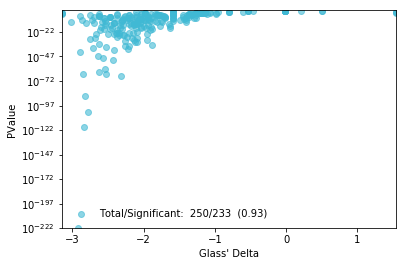

In [8]:
Plot_SPath_Results()

## Calculate Overlap Between two Drugs

In [4]:

def Check_Shortest_Distances(PPI,targets):
    '''
    Extract the min path between targets.
    This is always the minimum path between one target and any other target of the other set.
    Returns Mean of all paths (d_d) as well as paths (min_paths)
    
    This function uses only one set hence calulcates the intra drug distance or drug_module diamter
    
    '''
    filtered_targets = []
    for t in targets:
        if PPI.has_node(t):
            filtered_targets.append(t)

    min_paths = []
    if len(filtered_targets) > 1:
        try:
            for t1 in filtered_targets:
                min_distances = []
                for t2 in filtered_targets:
                    if t1 != t2:
                        #print nx.shortest_path(PPI,t1,t2)
                        if nx.has_path(PPI,t1,t2):
                            min_distances.append(len(nx.shortest_path(PPI,t1,t2))-1)
                min_paths.append(min(min_distances))
            d_d = sum(min_paths)/float(len(filtered_targets))

            return d_d,min_paths
        except:
            return None,None
    else:
        return None,None

def Check_Shortest_DistancesBetween(PPI, targets1, targets2):
    '''
    Extract the min path between targets.
    This is always the minimum path between one target and any other target of the other set.
    Returns Mean of all paths (d_d) as well as paths (min_paths)
    
    This function uses two sets hence calulcates the inter drug distance
    
    '''
    filtered_targets = []
    for t in targets1:
        if PPI.has_node(t):
            filtered_targets.append(t)

    filtered_targets2 = []
    for t in targets2:
        if PPI.has_node(t):
            filtered_targets2.append(t)

    min_paths = []
    if len(filtered_targets) >= 1 and len(filtered_targets2) >= 1:
        try:
            for t1 in filtered_targets:
                min_distances = []
                for t2 in filtered_targets2:
                    # print nx.shortest_path(PPI,t1,t2)
                    if nx.has_path(PPI, t1, t2):
                        min_distances.append(len(nx.shortest_path(PPI, t1, t2)) - 1)
                min_paths.append(min(min_distances))
            return min_paths
        except:
            return None, None
    else:
        return None, None




In [ ]:

#Load PPI
PPI = nx.read_gml('../data/PPI_Analysis/Human_Interactome.gml')

#Get all the CLOUD Targets
cloud_targets = {}
different_Targets = set()

#Calculate Sab based on only Targets (remove transporters and enzymes)
fp = open('../data/PPI_Analysis/CLOUD_to_TargetsSplit.csv','r')
fp.next()
for line in fp:
    tmp = line.strip().split(',')
    cloud_targets[tmp[0]] = list(set(tmp[1].split(';')))
    for t in tmp[1].split(';'):
        different_Targets.add(t)

#Calcualte within distances
within_Distances = {}
for c in cloud_targets:
    #print c
    if len(cloud_targets[c]) == 0:
        continue

    d_d, min_paths = Check_Shortest_Distances(PPI, cloud_targets[c])

    if d_d == None:
        continue
    else:
        within_Distances[c] = d_d

clouds = within_Distances.keys()
clouds.sort()

#Calculate separation between two drugs Sab
fp_out = open('../results/PPI_Analysis/Separation/Separation_TargetsOnly.csv','w')
fp_out.write('Drug1,Drug2,D_Drug1,D_Drug2,D_D1_D2,S\n')
for c in clouds:
    print c
    d_A = within_Distances[c]
    targets1 = cloud_targets[c]

    for c2 in clouds:
        #if c > c2:
        d_B = within_Distances[c2]
        targets2 = cloud_targets[c2]
        distances1 = Check_Shortest_DistancesBetween(PPI, targets1, targets2)
        distances2 = Check_Shortest_DistancesBetween(PPI, targets2, targets1)
        
        #Dab
        between_Distance = (sum(distances1)+sum(distances2))/float((len(distances1)+len(distances2)))

        #Sab
        separation = between_Distance - (d_A+d_B)/2.0

        fp_out.write(c+','+c2+','+str(d_A)+','+str(d_B)+','+str(between_Distance)+','+str(separation)+'\n')
fp_out.close()


CLOUD001
CLOUD003
CLOUD004
CLOUD005
CLOUD006


## Localization/Separation and GO term similarity

In [3]:
def Calculate_Similarity_MaxSpecificity(targets1, targets2, GO_genes_annotation, GO_Association_UP,isSeparation = False):
    '''
    Calculates similarity between two sets derived from an ontology based on the most specific term e.g. term with least annotations.
    Hence maximum similarity exits of two drugs are associated to exactly one GO term that exactly is associated only to these two proteins
    
    '''
    sims = []
    for t1 in targets1:
        for t2 in targets2:
            if t1 > t2 or isSeparation:
                if len([len(GO_genes_annotation[x]) for x in set(GO_Association_UP[t1]).intersection(GO_Association_UP[t2])]) == 0:
                    SimDis = 0
                else:
                    SimDis = 2.0 / min([len(GO_genes_annotation[x]) for x in set(GO_Association_UP[t1]).intersection(GO_Association_UP[t2])])
                sims.append(SimDis)
    if len(sims) > 0:
        return np.mean(sims)
    else:
        return  0


In [11]:
def GO_Self_ShortestPath():
    '''
    Check how the drug diameter (module size) correlates with GO-term similarity
    '''

    similarity_Type = 'MaxSpecificity'

    #Go through all three branches
    for go_branch in ['Component','Function','Process']:


        print go_branch

        # Get all the CLOUD Targets
        cloud_targets = {}
        fp = open('../data/PPI_Analysis/CLOUD_All_Targets.csv','r')
        fp.next()
        for line in fp:
            tmp = line.strip().split(',')
            cloud_targets[tmp[0]] = list(set(tmp[2].split(';')))

        #Get the drug module diamters
        fp = open('../results/PPI_Analysis/ShortestPath/ShortestPaths.csv','r')
        fp.next()
        drug_ShortestPath = []
        drugs = []
        for line in fp:
            tmp = line.strip().split(',')
            drugs.append(tmp[0])
            drug_ShortestPath.append(float(tmp[3]))


        #Bin the diameter sizes
        bin_means = binned_statistic(drug_ShortestPath, drug_ShortestPath,bins=[-3.2, -2.5, -2, -1.5, -1, -0.5, 0, 0.5, 1.6])
        
        #create a similarity dictionary
        similarties = {}
        for i in range(1,max(bin_means[2])+1):
            similarties[i] = []

        #Load the GO-Upstream branches
        print 'Load GO Associations:'
        GO_Association_UP,GO_genes_annotation = GO.getAllGene_Annotation(go_branch)
        print 'Done'


        #Calculate the similarity scores for all the drugs and add them to the specific bins
        for d,bin in zip(drugs,bin_means[2]):
            targets = cloud_targets[d]
            if len(targets) > 1:
                if similarity_Type == 'MaxSpecificity':
                    sims = Calculate_Similarity_MaxSpecificity(targets, targets, GO_genes_annotation,
                                                               GO_Association_UP)

                similarties[bin].append(np.mean(sims))


        #Plot the results as Boxplot
        plt.boxplot([similarties[x] for x in range(1,max(bin_means[2])+1)],showfliers=True)
        plt.xticks(range(1,max(bin_means[2])+1),['{:2.2f}'.format(x) for x in bin_means[1]])
        plt.xlabel("Glass' Delta")
        plt.ylabel("GO Similarity %s\n%s Similarity" %(go_branch,similarity_Type))
        #plt.show()
        plt.savefig('../results/PPI_Analysis/GO_Enrichment/Drugs_Self_ShortestPath/'+go_branch+'_%s_BoxPlot.pdf' %similarity_Type,format='pdf')
        plt.close()

        #Plot the results as Barplot
        #plt.plot(range(1, max(bin_means[2]) + 1), [np.mean(similarties[x]) for x in range(1, max(bin_means[2]) + 1)],
        #         c='#2291A5', zorder=1)
        plt.bar(range(1,max(bin_means[2])+1), [np.mean(similarties[x]) for x in range(1,max(bin_means[2])+1)], yerr=[1.96 * (np.std(similarties[x]) / np.sqrt(float(len(similarties[x])))) for x in range(1,max(bin_means[2])+1)], align='center', alpha=0.5, ecolor='black', capsize=10, color='#40B9D4', zorder=2)
        plt.xticks(range(1,max(bin_means[2])+1),['{:2.2f}'.format(x) for x in bin_means[1]])
        plt.xlabel("Glass' Delta")
        plt.ylabel("GO Similarity (%s)\n%s Similarity (95%% CI)" %(go_branch,similarity_Type))
        #plt.show()
        plt.savefig('../results/PPI_Analysis/GO_Enrichment/Drugs_Self_ShortestPath/'+go_branch+'_%s_BarPlot.pdf' %similarity_Type,format='pdf')
        plt.close()

In [12]:
GO_Self_ShortestPath()

Component
Load GO Associations:
Done
Function
Load GO Associations:
Done
Process
Load GO Associations:
Done


In [13]:

def GO_Self_LCC():
    '''
    Check how the drug LCC size correlates with GO-term similarity
    '''


    similarity_Type = 'MaxSpecificity'
    
    #Go through all three branches
    for go_branch in ['Component','Function','Process']:


        print go_branch

        # Get all the CLOUD Targets
        cloud_targets = {}
        fp = open('../data/PPI_Analysis/CLOUD_All_Targets.csv','r')
        fp.next()
        for line in fp:
            tmp = line.strip().split(',')
            cloud_targets[tmp[0]] = list(set(tmp[2].split(';')))

        # Read the per drug LCC sizes
        fp = open('../results/PPI_Analysis/LCC/LCC_Sizes.csv','r')
        fp.next()
        drug_ShortestPath = []
        drugs = []
        for line in fp:
            tmp = line.strip().split(',')
            if tmp[2] != 'nan':
                drugs.append(tmp[0])
                drug_ShortestPath.append(float(tmp[2]))


        #Bin the LCC sizes
        bin_means = binned_statistic(drug_ShortestPath, drug_ShortestPath,bins=[min(drug_ShortestPath), 4, 8, 12, 16, max(drug_ShortestPath)])
        
        #Create a similarity dictionary
        similarties = {}
        for i in range(1, max(bin_means[2]) + 1):
            similarties[i] = []

        #Extract GO-upstream ontologies
        print 'Load GO Associations:'
        GO_Association_UP, GO_genes_annotation = GO.getAllGene_Annotation(go_branch)
        print 'Done'

            
        #Calcualte the similarities and add results to the specific bins
        for d,bin in zip(drugs,bin_means[2]):
            targets = cloud_targets[d]
            if len(targets) > 1:
                if similarity_Type == 'MaxSpecificity':
                    sims = Calculate_Similarity_MaxSpecificity(targets, targets, GO_genes_annotation,
                                                               GO_Association_UP)
                similarties[bin].append(np.mean(sims))


        #Plot a boxplot
        plt.boxplot([similarties[x] for x in range(1, max(bin_means[2]) + 1)])
        plt.xticks(range(1, max(bin_means[2]) + 1),['{:2.2f}'.format(x) for x in bin_means[1]])
        plt.xlabel("ZScore")
        plt.ylabel("GO Similarity %s\n%s Similarity" %(go_branch,similarity_Type))
        #plt.show()
        plt.savefig('../results/PPI_Analysis/GO_Enrichment/Drugs_Self_LCC/'+go_branch+'_%s_BoxPlot.pdf' %similarity_Type,format='pdf')
        plt.close()

        #Plot a barplot
        #plt.plot(range(1, max(bin_means[2]) + 1), [np.mean(similarties[x]) for x in range(1, max(bin_means[2]) + 1)],c='#2291A5',zorder=1)
        plt.bar(range(1, max(bin_means[2]) + 1), [np.mean(similarties[x]) for x in range(1, max(bin_means[2]) + 1)],
                yerr=[1.96 * (np.std(similarties[x]) / np.sqrt(float(len(similarties[x])))) for x in
                      range(1, max(bin_means[2]) + 1)], align='center', alpha=0.5, ecolor='black', capsize=10,color='#40B9D4',zorder=2)

        plt.xticks(range(1, max(bin_means[2]) + 1),['{:2.2f}'.format(x) for x in bin_means[1]])

        plt.xlabel("ZScore")
        plt.ylabel("GO Similarity (%s)\n%s Similarity" %(go_branch,similarity_Type))
        #plt.show()
        plt.savefig('../results/PPI_Analysis/GO_Enrichment/Drugs_Self_LCC/'+go_branch+'_%s_BarPlot.pdf' %similarity_Type,format='pdf')
        plt.close()


In [14]:
GO_Self_LCC()

Component
Load GO Associations:
Done
Function
Load GO Associations:
Done
Process
Load GO Associations:
Done


In [17]:
def GO_Separation():
    '''
    Check how the drug Sab (drug module overlap) correlates with GO-term similarity
    '''

    
    similarity_Type = 'MaxSpecificity'
    
    #Go through all branches
    for go_branch in ['Component','Function','Process']:


        print go_branch

        # Get all the CLOUD Targets
        cloud_targets = {}
        all_Drugs = []
        fp = open('../data/PPI_Analysis/CLOUD_All_Targets.csv','r')
        fp.next()
        for line in fp:
            tmp = line.strip().split(',')
            cloud_targets[tmp[0]] = list(set(tmp[2].split(';')))
            all_Drugs.append(tmp[0])
        
        #Load separation results
        fp = open('../results/PPI_Analysis/Separation/Separation_half.csv', 'r')
        fp.next()
        drug_ShortestPath = []
        drugs = []
        for line in fp:
            tmp = line.strip().split(',')
            if tmp[2] != 'nan':
                drugs.append(tmp[0]+','+tmp[1])
                drug_ShortestPath.append(float(tmp[5]))

        #Bin the separation sizes
        bin_means = binned_statistic(drug_ShortestPath, drug_ShortestPath,bins=[min(drug_ShortestPath), -1.5, -1, -0.5, 0, 0.5, 1, 1.5, max(drug_ShortestPath)])

        #Create a similarity dictionary    
        similarties = {}
        for i in range(1, max(bin_means[2]) + 1):
            similarties[i] = []

        #Load GO association (plus upstream for all genes)
        print 'Load GO Associations:'
        GO_Association_UP, GO_genes_annotation = GO.getAllGene_Annotation(go_branch)
        print 'Done'

        
        #Create a random distribution (10k)
        random_distribution = []
        for i in range(1,10000):
            randDrugs = random.sample(all_Drugs,2)
            targets1 = cloud_targets[randDrugs[0]]
            targets2 = cloud_targets[randDrugs[1]]


            if len(targets1) > 0 and len(targets2) > 0:
                if similarity_Type == 'MaxSpecificity':
                    sim = Calculate_Similarity_MaxSpecificity(targets1, targets2, GO_genes_annotation,GO_Association_UP, isSeparation=True)
                random_distribution.append(sim)

        print 'Finished Random'

        #Calculate the similarity between two drugs an add it to the correspdoning bin
        for d, bin in zip(drugs, bin_means[2]):
            drugs = d.split(',')

            targets1 = cloud_targets[drugs[0]]
            targets2 = cloud_targets[drugs[1]]
            if len(targets1) > 0 and len(targets2) > 0:
                if similarity_Type == 'MaxSpecificity':
                    sim = Calculate_Similarity_MaxSpecificity(targets1, targets2, GO_genes_annotation,GO_Association_UP, isSeparation=True)
                similarties[bin].append(sim)


        #Plot as boxplot
        plt.boxplot([similarties[x] for x in range(1, max(bin_means[2]) + 1)])
        plt.xticks(range(1, max(bin_means[2]) + 1),['{:2.2f}'.format(x) for x in bin_means[1]])
        plt.axhline(np.mean(random_distribution),c='grey', ls='--')
        plt.xlabel("Separation Sab")
        plt.ylabel("GO Similarity %s\n%s Similarity" %(go_branch,similarity_Type))
        #plt.show()
        plt.savefig('../results/PPI_Analysis/GO_Enrichment/Drugs_Separation/'+go_branch+'_%s_BoxPlot.pdf' %similarity_Type,format='pdf')
        plt.close()
        
        
        #Plot as barplot
        #plt.plot(range(1, max(bin_means[2]) + 1), [np.mean(similarties[x]) for x in range(1, max(bin_means[2]) + 1)],c='#2291A5', zorder=1)
        plt.bar(range(1, max(bin_means[2]) + 1), [np.mean(similarties[x]) for x in range(1, max(bin_means[2]) + 1)],
                yerr=[1.96 * (np.std(similarties[x]) / np.sqrt(float(len(similarties[x])))) for x in
                      range(1, max(bin_means[2]) + 1)], align='center', alpha=0.5, ecolor='black', capsize=10, color='#40B9D4', zorder=2)

        plt.xticks(range(1, max(bin_means[2]) + 1),['{:2.2f}'.format(x) for x in bin_means[1]])
        plt.xlabel("Separation Sab")
        plt.ylabel("GO Similarity (%s)\n%s Similarity" %(go_branch,similarity_Type))
        plt.axhline(np.mean(random_distribution), c='grey', ls='--')
        #plt.show()
        plt.savefig('../results/PPI_Analysis/GO_Enrichment/Drugs_Separation/'+go_branch+'_%s_BarPlot.pdf' %similarity_Type,format='pdf')
        plt.close()

In [18]:
GO_Separation()

Component
Load GO Associations:
Done
Finished Random
Function
Load GO Associations:
Done
Finished Random
Process
Load GO Associations:
Done
Finished Random


## Localization/Separation and GO term similarity

In [19]:

def Disease_Self_ShortestPath():
    '''
    Check how the intra drug distance (drug module diamters) correlates with Disease term similarity
    '''

    similarity_Type = 'MaxSpecificity'


    # Get all the CLOUD Targets
    cloud_targets = {}
    fp = open('../data/PPI_Analysis/CLOUD_All_Targets.csv','r')
    fp.next()
    for line in fp:
        tmp = line.strip().split(',')
        cloud_targets[tmp[0]] = list(set(tmp[2].split(';')))

    #Get drug module diamters
    fp = open('../results/PPI_Analysis/ShortestPath/ShortestPaths.csv','r')
    fp.next()
    drug_ShortestPath = []
    drugs = []
    for line in fp:
        tmp = line.strip().split(',')
        drugs.append(tmp[0])
        drug_ShortestPath.append(float(tmp[3]))



    #Bin the drug module diamter sizes
    bin_means = binned_statistic(drug_ShortestPath, drug_ShortestPath, bins=[-3.2,-2.5,-2,-1.5,-1,1.6])
   
    #create similarity file
    similarties = {}
    for i in range(1,max(bin_means[2])+1):
        similarties[i] = []

    #Load disease annotion (plus upstream annotation)
    print 'Load Disease Associations:'
    Disease_Association_UP,d_diseases_annotation = GO.getAllGene_Disease_Annotation()
    print 'Done'


    #calculate similarity and add to specific bin
    for d,bin in zip(drugs,bin_means[2]):

        targets =  cloud_targets[d]

        if len(targets) > 1:
            if similarity_Type == 'MaxSpecificity':
                sims = Calculate_Similarity_MaxSpecificity(targets, targets, d_diseases_annotation,Disease_Association_UP)
            similarties[bin].append(sims)



    #Plot as Boxplot
    plt.boxplot([similarties[x] for x in range(1,max(bin_means[2])+1)],showfliers=True)
    plt.xticks(range(1,max(bin_means[2])+1),['{:2.2f}'.format(x) for x in bin_means[1]])
    plt.xlabel("Glass' Delta")
    plt.ylabel("Disease Similarity\n%s Similarity" %similarity_Type)
    #plt.show()
    plt.savefig('../results/PPI_Analysis/Disease_Enrichment/ShortestPath_Disease_BoxPlot.pdf' ,format='pdf')
    plt.close()
    
    
    #Plot as Barplot
    #plt.plot(range(1, max(bin_means[2]) + 1), [np.mean(similarties[x]) for x in range(1, max(bin_means[2]) + 1)], c='#2291A5', zorder=1)
    plt.bar(range(1,max(bin_means[2])+1), [np.mean(similarties[x]) for x in range(1,max(bin_means[2])+1)], yerr=[1.96 * (np.std(similarties[x]) / np.sqrt(float(len(similarties[x])))) for x in range(1,max(bin_means[2])+1)], align='center', alpha=0.5, ecolor='black', capsize=10, color='#40B9D4', zorder = 2)
    plt.xticks(range(1,max(bin_means[2])+1),['{:2.2f}'.format(x) for x in bin_means[1]])
    plt.xlabel("Glass' Delta")
    plt.ylabel("Disease Similarity\n%s (95%% CI)" %similarity_Type)
    #plt.show()
    plt.savefig('../results/PPI_Analysis/Disease_Enrichment/ShortestPath_Disease_BarPlot.pdf',format='pdf')
    plt.close()

In [20]:
Disease_Self_ShortestPath()

Load Disease Associations:
Done


In [21]:
def Disease_Self_LCC():
    '''
    Check how the  drug LCC size correlates with Disease term similarity
    '''
    
    
    similarity_Type = 'MaxSpecificity'

    # Get all the CLOUD Targets
    cloud_targets = {}
    fp = open('../data/PPI_Analysis/CLOUD_All_Targets.csv','r')
    fp.next()
    for line in fp:
        tmp = line.strip().split(',')
        cloud_targets[tmp[0]] = list(set(tmp[2].split(';')))

    # Load LCC sizes
    fp = open('../results/PPI_Analysis/LCC/LCC_Sizes.csv','r')
    fp.next()
    drug_ShortestPath = []
    drugs = []
    for line in fp:
        tmp = line.strip().split(',')
        if tmp[2] != 'nan':
            drugs.append(tmp[0])
            drug_ShortestPath.append(float(tmp[2]))


    #Bin the LCC sizes
    bin_means = binned_statistic(drug_ShortestPath, drug_ShortestPath, bins=[min(drug_ShortestPath), 4, 8, 12, 16, max(drug_ShortestPath)])

    #Calcualte similarity dictionary
    similarties = {}
    for i in range(1, max(bin_means[2]) + 1):
        similarties[i] = []

    #Load disease ontology plus upstream terms
    print 'Load Disease Associations:'
    Disease_Association_UP,d_diseases_annotation = GO.getAllGene_Disease_Annotation()
    print 'Done'


    #Calculate similarity and add to specific bin
    for d,bin in zip(drugs,bin_means[2]):

        targets = cloud_targets[d]
        if len(targets) > 1:
            if similarity_Type == 'MaxSpecificity':
                sims = Calculate_Similarity_MaxSpecificity(targets, targets, d_diseases_annotation, Disease_Association_UP)
            similarties[bin].append(np.mean(sims))

    #plot as boxplot
    plt.boxplot([similarties[x] for x in range(1,max(bin_means[2])+1)],showfliers=True)
    plt.xticks(range(1,max(bin_means[2])+1),['{:2.2f}'.format(x) for x in bin_means[1]])
    plt.xlabel("Glass' Delta")
    plt.ylabel("Disease Similarity\n%s Similarity" %similarity_Type)
    #plt.show()
    plt.savefig('../results/PPI_Analysis/Disease_Enrichment/LCC_Disease_BoxPlot.pdf' ,format='pdf')
    plt.close()

    #plot as barplot
    #plt.plot(range(1, max(bin_means[2]) + 1), [np.mean(similarties[x]) for x in range(1, max(bin_means[2]) + 1)], c='#2291A5', zorder=1)
    plt.bar(range(1,max(bin_means[2])+1), [np.mean(similarties[x]) for x in range(1,max(bin_means[2])+1)], yerr=[1.96 * (np.std(similarties[x]) / np.sqrt(float(len(similarties[x])))) for x in range(1,max(bin_means[2])+1)], align='center', alpha=0.5, ecolor='black', capsize=10, color='#40B9D4', zorder = 2)
    plt.xticks(range(1,max(bin_means[2])+1),['{:2.2f}'.format(x) for x in bin_means[1]])
    plt.xlabel("Glass' Delta")
    plt.ylabel("Disease Similarity\n%s (95%% CI)" %similarity_Type)
    #plt.show()
    plt.savefig('../results/PPI_Analysis/Disease_Enrichment/LCC_Disease_BarPlot.pdf',format='pdf')
    plt.close()

In [22]:
Disease_Self_LCC()

Load Disease Associations:
Done


In [23]:

def Disease_Separation():
    '''
    Check how the drug module overlap (Sab score) correlates with Disease term similarity
    '''

    similarity_Type = 'MaxSpecificity'


    # Get all the CLOUD Targets
    cloud_targets = {}
    all_Drugs = []
    fp = open('../data/PPI_Analysis/CLOUD_All_Targets.csv','r')
    fp.next()
    for line in fp:
        tmp = line.strip().split(',')
        cloud_targets[tmp[0]] = list(set(tmp[2].split(';')))
        all_Drugs.append(tmp[0])

    #Load the results
    fp = open('../results/PPI_Analysis/Separation/Separation_half.csv', 'r')
    fp.next()
    drug_ShortestPath = []
    Alldrugs = []
    for line in fp:
        tmp = line.strip().split(',')
        if tmp[2] != 'nan':
            Alldrugs.append(tmp[0]+','+tmp[1])
            drug_ShortestPath.append(float(tmp[5]))



    #Bin the sab overlaps
    bin_means = binned_statistic(drug_ShortestPath, drug_ShortestPath, bins=[min(drug_ShortestPath),-1.5,-1,-0.5,0,0.5,1,1.5,max(drug_ShortestPath)])

    #create similarity dictionary
    similarties = {}
    for i in range(1, max(bin_means[2]) + 1):
        similarties[i] = []

    #Load disease ontology (plus upstream)
    print 'Load Disease Associations:'
    Disease_Association_UP,d_diseases_annotation = GO.getAllGene_Disease_Annotation()
    print 'Done'


    #Calculate random distribution
    random_distribution = []
    for i in range(1,1000):
        randDrugs = random.sample(all_Drugs,2)
        targets1 = cloud_targets[randDrugs[0]]
        targets2 = cloud_targets[randDrugs[1]]

        if len(targets1) > 0 and len(targets2) > 0:
            if similarity_Type == 'MaxSpecificity':
                sim = Calculate_Similarity_MaxSpecificity(targets1,targets2,d_diseases_annotation,Disease_Association_UP,isSeparation=True)
            random_distribution.append(sim)

    print 'Finished Random'


    #calculate similatities and add to specific bin
    for d, bin in zip(Alldrugs, bin_means[2]):

        drugs = d.split(',')

        targets1 = cloud_targets[drugs[0]]
        targets2 = cloud_targets[drugs[1]]

        if len(targets1) > 0 and len(targets2) > 0:
            if similarity_Type == 'MaxSpecificity':
                sim = Calculate_Similarity_MaxSpecificity(targets1,targets2,d_diseases_annotation,Disease_Association_UP,isSeparation=True)
            else:
                sim = Calculate_Similarity_Jaccard(targets1, targets2,Disease_Association_UP,isSeparation=True)

            similarties[bin].append(np.mean(sim))


    #Plot as boxplot
    plt.boxplot([similarties[x] for x in range(1,max(bin_means[2])+1)],showfliers=True)
    plt.xticks(range(1,max(bin_means[2])+1),['{:2.2f}'.format(x) for x in bin_means[1]])
    plt.xlabel("Separation Sab")
    plt.ylabel("Disease Similarity\n%s Similarity" %similarity_Type)
    #plt.show()
    plt.savefig('../results/PPI_Analysis/Disease_Enrichment/Separation_Disease_BoxPlot.pdf' ,format='pdf')
    plt.close()

    #Plot as barplot
    #plt.plot(range(1, max(bin_means[2]) + 1), [np.mean(similarties[x]) for x in range(1, max(bin_means[2]) + 1)], c='#2291A5', zorder=1)
    plt.bar(range(1,max(bin_means[2])+1), [np.mean(similarties[x]) for x in range(1,max(bin_means[2])+1)], yerr=[1.96 * (np.std(similarties[x]) / np.sqrt(float(len(similarties[x])))) for x in range(1,max(bin_means[2])+1)], align='center', alpha=0.5, ecolor='black', capsize=10, color='#40B9D4', zorder = 2)
    plt.xticks(range(1,max(bin_means[2])+1),['{:2.2f}'.format(x) for x in bin_means[1]])
    plt.axhline(np.mean(random_distribution), c='grey', ls='--')
    plt.xlabel("Separation Sab")
    plt.ylabel("Disease Similarity\n%s (95%% CI)" %similarity_Type)
    #plt.show()
    plt.savefig('../results/PPI_Analysis/Disease_Enrichment/Separation_Disease_BarPlot.pdf',format='pdf')
    plt.close()

In [24]:
Disease_Separation()

Load Disease Associations:
Done
Finished Random


## Shared Side Effects

In [39]:
def checkSameSEs(SEs1,SEs2):
    '''
    Check overlap between atcs; 1 if overlap exists 0 if not. Check for at least ONE overlap within the two sets.
    Return 1 if true or 0 if false
    '''
        
    oneOverlap = False
    for SE1 in SEs1:
        for SE2 in SEs2:
            if SE1 == SE2:
                oneOverlap = True

    if oneOverlap:
        return  1
    else:
        return  0

In [49]:
def shortest_distanceSideEffects():


    # Get all the CLOUD Targets
    cloud_SideEffects = {}
    all_Drugs = []
    fp = open('../data/PPI_Analysis/CLOUD_to_Offsides.csv','r')
    fp.next()
    for line in fp:
        tmp = line.strip().split(',')
        cloud_SideEffects[tmp[0]] = list(set(tmp[2].split(';')))
        all_Drugs.append(tmp[0])

    
    #Load the results
    fp = open('../results/PPI_Analysis/Separation/Separation_half.csv', 'r')
    fp.next()
    drug_ShortestPath = []
    drug_ShortestPath_2 = {}
    Alldrugs = []
    for line in fp:
        tmp = line.strip().split(',')
        if tmp[2] != 'nan':
            Alldrugs.append(tmp[0]+','+tmp[1])
            drug_ShortestPath.append(float(tmp[5]))
            drug_ShortestPath_2[tmp[0] + ',' + tmp[1]] = float(tmp[5])

            

    #Split Sab scores in positive (>0 ) and negative (<0) scores. Then calculate the percent overlap (FIRST LEVEL)
    negative_sab = []
    positive_sab = []
    for drugPair in drug_ShortestPath_2.keys():
        drugs = drugPair.split(',')
        if drug_ShortestPath_2[drugPair] < 0:
            negative_sab.append(checkSameSEs(cloud_SideEffects[drugs[0]],cloud_SideEffects[drugs[1]]))
        else:
            positive_sab.append(checkSameSEs(cloud_SideEffects[drugs[0]], cloud_SideEffects[drugs[1]]))
        
    
    #calcualte the percentage overlap
    negative_sab = sum(negative_sab)/float(len(negative_sab)) * 100
    positive_sab =  sum(positive_sab)/float(len(positive_sab)) * 100
    
    #Create the bar plot showing the overlap (in percent)
    plt.bar([0,1],[negative_sab,positive_sab],align='center', alpha=0.5, ecolor='black', capsize=10,color='#40B9D4', zorder=2)
    plt.xticks([0,1], ['Negative','Positive'])
    plt.xlabel("Sab")
    plt.ylabel("Percent overlap drugs have overlap overlap")
    #plt.show()
    plt.savefig('../results/PPI_Analysis/SideEffect_Enrichment/SideEffects_Overlap_Bars.pdf',format='pdf')
    plt.close()

    
    
    
    print 'Average Sab'
    #Inverse logic and now split Sab scores bases on if a drugpair has overlaping ATC classes or not
    same_SE = []
    different_SE = []
    for drugPair in drug_ShortestPath_2.keys():
        drugs = drugPair.split(',')
        SE_Overlap = checkSameSEs(cloud_SideEffects[drugs[0]], cloud_SideEffects[drugs[1]])
        if SE_Overlap == 1:
            same_SE.append(drug_ShortestPath_2[drugPair])
        else:
            different_SE.append(drug_ShortestPath_2[drugPair])


    #calcualte the mean Sab score for drug pairs with overlapping and without overlapping ATC classes
    same = np.mean(same_SE)
    different = np.mean(different_SE)

    #Create bar plot
    plt.bar([0, 1], [same, different], align='center', alpha=0.5, ecolor='black', capsize=10,color='#40B9D4', zorder=2, yerr=[1.96 * (np.std(x) / np.sqrt(float(len(x)))) for x in [same_SE, different_SE]])
    plt.xticks([0, 1], ['Yes', 'No'])
    plt.xlabel("Has SE overlap")
    plt.ylabel("Average Sab")
    #plt.show()
    plt.savefig('../results/PPI_Analysis/SideEffect_Enrichment/SAB_with_DrugOverlap.pdf', format='pdf')
    plt.close()
    
    
    
    
    return 
            
    similarity_Type = 'Number of overlapping Side Effects'
            
    #Bin the sab overlaps
    bin_means = binned_statistic(drug_ShortestPath, drug_ShortestPath, bins=[min(drug_ShortestPath),-1.5,-1,-0.5,0,0.5,1,1.5,max(drug_ShortestPath)])

    #create similarity dictionary
    similarties = {}
    for i in range(1, max(bin_means[2]) + 1):
        similarties[i] = []

   
    #Calculate random distribution
    random_distribution = []
    for i in range(1,1000):
        randDrugs = random.sample(all_Drugs,2)
        sideEffects1 = set(cloud_SideEffects[randDrugs[0]])
        sideEffects2 = set(cloud_SideEffects[randDrugs[1]])

        
        if len(sideEffects1) > 0 and len(sideEffects2) > 0:
            result = len(sideEffects1.intersection(sideEffects2))

            random_distribution.append(result)

    print 'Finished Random'

    
    #calculate similatities and add to specific bin
    for d, bin in zip(Alldrugs, bin_means[2]):

        drugs = d.split(',')

        sideEffects1 = set(cloud_SideEffects[drugs[0]])
        sideEffects2 = set(cloud_SideEffects[drugs[1]])

        if len(sideEffects1) > 0 and len(sideEffects2) > 0:
            result = len(sideEffects1.intersection(sideEffects2))

            similarties[bin].append(result)
        
            
    #Plot as boxplot
    plt.boxplot([similarties[x] for x in range(1,max(bin_means[2])+1)],showfliers=True)
    plt.xticks(range(1,max(bin_means[2])+1),['{:2.2f}'.format(x) for x in bin_means[1]])
    plt.xlabel("Separation Sab")
    plt.ylabel("Side Effect Similarity\n%s Similarity" %similarity_Type)
    #plt.show()
    plt.savefig('../results/PPI_Analysis/SideEffect_Enrichment/Separation_SideEffects_BoxPlot.pdf' ,format='pdf')
    plt.close()

    #Plot as barplot
    #plt.plot(range(1, max(bin_means[2]) + 1), [np.mean(similarties[x]) for x in range(1, max(bin_means[2]) + 1)], c='#2291A5', zorder=1)
    plt.bar(range(1,max(bin_means[2])+1), [np.mean(similarties[x]) for x in range(1,max(bin_means[2])+1)], yerr=[1.96 * (np.std(similarties[x]) / float(len(similarties[x]))) for x in range(1,max(bin_means[2])+1)], align='center', alpha=0.5, ecolor='black', capsize=10, color='#40B9D4', zorder = 2)
    plt.xticks(range(1,max(bin_means[2])+1),['{:2.2f}'.format(x) for x in bin_means[1]])
    plt.axhline(np.mean(random_distribution), c='grey', ls='--')
    plt.xlabel("Separation Sab")
    plt.ylabel("Side Effect Similarity\n%s (95%% CI)" %similarity_Type)
    #plt.show()
    plt.savefig('../results/PPI_Analysis/SideEffect_Enrichment/Separation_SideEffects_BarPlot.pdf',format='pdf')
    plt.close()
    
    
    
 
   
    
    
    
            
shortest_distanceSideEffects()

Average Sab


## Get Example PPI perturbations

In [10]:


drug_targets = {}

fp = open('../data/PPI_Analysis/CLOUD_to_TargetsSplit.csv')
fp.next()
for line in fp:
    tmp = line.strip().split(',')
    drug_targets[tmp[0]] = tmp[1].split(';')

    
    
#for d in drug_targets.keys():
    #G_new = nx.subgraph(PPI,drug_targets[d])
    #nx.draw(G_new)
    #plt.title(d)
    #plt.show(G_new)
    #plt.close() 
    
#Examples CLOUD178, CLOUD057, CLOUD139

In [54]:
for drug in drug_targets.keys():

    #drug = 'CLOUD057'
    print drug
    drug_subnetwork = nx.Graph()

    if len(drug_targets[drug]) > 20:
        continue
    
    for target in drug_targets[drug]:
        for target2 in drug_targets[drug]:
            if PPI.has_node(target) == True and PPI.has_node(target2) == True:
                if nx.has_path(PPI,target,target2):
                    path = nx.shortest_path(PPI,target, target2)
                    #print path
                    for i in range(0,len(path)-1):
                        #print path[i]
                        #print path[i+1]
                        drug_subnetwork.add_edge(path[i],path[i+1])




    from networkx.algorithms.approximation import steiner_tree

    steiner_tree = steiner_tree(drug_subnetwork,drug_targets[drug])        

    
    #color_map = []
    #for node in drug_subnetwork.nodes():
    #    if node in drug_targets[drug]:
    #        color_map.append('red')
    #    else: color_map.append('grey')      

    #nx.draw(drug_subnetwork,node_color = color_map,with_labels = True)
    #nx.write_gml(drug_subnetwork,'../results/PPI_Analysis/ExamplePPI_Peturbations/CLOUD178.gml')
    #nx.draw(drug_subnetwork)
    #plt.title(drug)
    #plt.show()
    #plt.close() 



    color_map = []
    for node in steiner_tree.nodes():
        if node in drug_targets[drug]:
            color_map.append('red')
        else: color_map.append('grey')      

    nx.draw(steiner_tree,node_color = color_map,with_labels = True)
    #nx.write_gml(drug_subnetwork,'../results/PPI_Analysis/ExamplePPI_Peturbations/CLOUD178.gml')
    #nx.draw(drug_subnetwork)
    plt.title(drug)
    #plt.show()
    plt.savefig('../results/PPI_Analysis/ExamplePPI_Peturbations/'+drug+'.png')
    plt.close() 


CLOUD215
CLOUD179
CLOUD159
CLOUD175
CLOUD174
CLOUD177
CLOUD158
CLOUD171
CLOUD170
CLOUD173
CLOUD172
CLOUD074
CLOUD075
CLOUD076
CLOUD077
CLOUD070
CLOUD071
CLOUD072
CLOUD073
CLOUD191
CLOUD078
CLOUD079
CLOUD265
CLOUD108
CLOUD267
CLOUD266
CLOUD261
CLOUD260
CLOUD208
CLOUD109
CLOUD146
CLOUD180
CLOUD181
CLOUD182
CLOUD147
CLOUD184
CLOUD185
CLOUD186
CLOUD187
CLOUD188
CLOUD189
CLOUD218
CLOUD067
CLOUD066
CLOUD065
CLOUD064
CLOUD063
CLOUD062
CLOUD061
CLOUD060
CLOUD100
CLOUD101
CLOUD102
CLOUD103
CLOUD104
CLOUD105
CLOUD069
CLOUD068
CLOUD212
CLOUD219
CLOUD178
CLOUD148
CLOUD149
CLOUD193
CLOUD192
CLOUD058
CLOUD059
CLOUD197
CLOUD106
CLOUD195
CLOUD194
CLOUD052
CLOUD053
CLOUD050
CLOUD051
CLOUD056
CLOUD057
CLOUD054
CLOUD055
CLOUD119
CLOUD118
CLOUD198
CLOUD113
CLOUD112
CLOUD111
CLOUD110
CLOUD117
CLOUD116
CLOUD115
CLOUD114
CLOUD247
CLOUD246
CLOUD245
CLOUD131
CLOUD244
CLOUD130
CLOUD243
CLOUD242
CLOUD203
CLOUD202
CLOUD201
CLOUD200
CLOUD049
CLOUD048
CLOUD205
CLOUD204
CLOUD045
CLOUD044
CLOUD047
CLOUD046
CLOUD041
C

['5422', '6240', '3458', '4780', '367', '2737', '9970', '2099', '7157', '55775', '2101', '50484']
make steiner tree
12
11


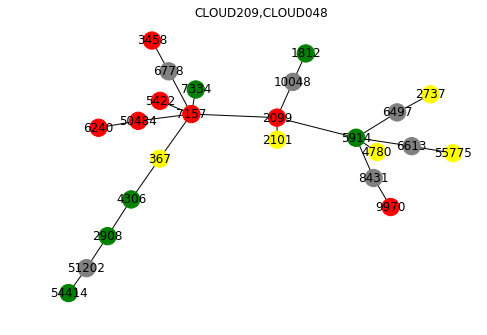

In [73]:

drug_targets = {}

fp = open('../data/PPI_Analysis/CLOUD_to_TargetsSplit.csv')
fp.next()
for line in fp:
    tmp = line.strip().split(',')
    drug_targets[tmp[0]] = tmp[1].split(';')

    

print drug_targets['CLOUD209']
    
    
CLOUDs_of_interest = ['CLOUD209','CLOUD048']   

    
targets = list(drug_targets[CLOUDs_of_interest[0]])    
targets.extend(drug_targets[CLOUDs_of_interest[1]])
#targets.extend(drug_targets[CLOUDs_of_interest[2]])


for t1 in targets:
    for t2 in targets:
        if PPI.has_node(t1) == True and PPI.has_node(t1) == True:
            if nx.has_path(PPI,t1,t2):
                path = nx.shortest_path(PPI,t1, t2)
                for i in range(0,len(path)-1):
                    #print path[i]
                    #print path[i+1]
                    drug_subnetwork.add_edge(path[i],path[i+1])

                    
                    

from networkx.algorithms.approximation import steiner_tree

print 'make steiner tree'
Mysteiner_tree = steiner_tree(drug_subnetwork,targets)  



print len(drug_targets[CLOUDs_of_interest[0]])
print len(drug_targets[CLOUDs_of_interest[1]])

color_map = []
for node in Mysteiner_tree.nodes():
    if  node in drug_targets[CLOUDs_of_interest[0]] and  node in drug_targets[CLOUDs_of_interest[1]]:
         color_map.append('yellow')
    elif node in drug_targets[CLOUDs_of_interest[0]]:
        color_map.append('red')
    elif node in drug_targets[CLOUDs_of_interest[1]]:
        color_map.append('green')
   
    else: color_map.append('grey')      
        
        
nx.draw(Mysteiner_tree,node_color = color_map,with_labels = True)
#nx.write_gml(drug_subnetwork,'../results/PPI_Analysis/ExamplePPI_Peturbations/CLOUD178.gml')
#nx.draw(drug_subnetwork)
plt.title(drug1+','+drug2)
plt.show()
    


